In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_excel('pillow.xlsx')

In [3]:
# 计算每个产品的总销量
df1['Total_sales'] = df1.groupby('Version')['Sales_volume'].transform('sum')
df1

,Month,Sales_volume,Revenue,Cost,Promotion_expense,Profit,Version,Unit_price,Unit_cost,ROI,Profit_rate,Target,Time_to_peak,Total_sales
0,8,0.0,0.00,0.00,0.000000e+00,0.000000e+00,1,130.237936,56.353391,0.655851,0.360520,8599.0,3,688054.0
1,9,8599.0,1986565.00,513463.73,2.979848e+05,1.175117e+06,1,231.022793,59.712028,1.448171,0.591532,22031.0,3,688054.0
2,10,22031.0,5027268.00,1296847.55,7.540902e+05,2.976330e+06,1,228.190640,58.864670,1.451205,0.592037,57819.0,3,688054.0
3,11,57819.0,13622729.00,3466877.14,2.043409e+06,8.112443e+06,1,235.609903,59.960863,1.472236,0.595508,34354.0,3,688054.0
4,12,34354.0,7977976.00,2038590.83,1.196696e+06,4.742689e+06,1,232.228445,59.340712,1.465925,0.594473,20282.0,3,688054.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,7,2407.0,222427.90,119451.71,3.336418e+04,6.961201e+04,4,92.408766,49.626801,0.455529,0.312964,2368.0,2,238633.2
87,8,2368.0,236032.55,130987.47,3.540488e+04,6.964020e+04,4,99.675908,55.315655,0.418530,0.295045,3459.0,2,238633.2
88,9,3459.0,316456.20,164136.12,4.746843e+04,1.048516e+05,4,91.487771,47.451899,0.495508,0.331331,2572.0,2,238633.2
89,10,2572.0,254552.28,128578.71,3.818284e+04,8.779073e+04,4,98.970560,49.991722,0.526445,0.344883,3046.0,2,238633.2


In [4]:
from sklearn.preprocessing import StandardScaler
# 提取特征和目标变量
features = ['Month','Sales_volume','Total_sales','Unit_price','Unit_cost', 'ROI','Profit_rate', 'Time_to_peak']
target = 'Target'

# 全局特征归一化处理
scaler_X = StandardScaler()
X_all = scaler_X.fit_transform(df1[features].values)

# 全局销量归一化处理
scaler_y = StandardScaler()
y_all = scaler_y.fit_transform(df1[[target]].values)

# 创建一个新的 DataFrame 副本来避免修改原始 DataFrame
col_range = ['Month','Sales_volume','Total_sales','Unit_price','Unit_cost', 'ROI','Profit_rate', 'Time_to_peak', 'Target']
df1_normalized = df1[col_range].copy()
df1_normalized.loc[:, features] = X_all
df1_normalized.loc[:, target] = y_all
df1_normalized.loc[:, 'Version'] = df1['Version']

# 现在 df1_normalized 包含了所有归一化后的数据，并安全地更新了数据而不会引起警告
df1_normalized['Int_month'] = df1['Month']
df1_normalized

,Month,Sales_volume,Total_sales,Unit_price,Unit_cost,ROI,Profit_rate,Time_to_peak,Target,Version,Int_month
0,0.434457,-0.927585,1.226901,0.651016,1.296554,-0.005092,-0.279343,-0.405964,-0.551898,1,8
1,0.720946,-0.522560,1.226901,3.936972,1.910764,3.157204,2.502679,-0.405964,0.086762,1,9
2,1.007436,0.110106,1.226901,3.844633,1.755804,3.169310,2.508766,-0.405964,1.788397,1,10
3,1.293925,1.795771,1.226901,4.086528,1.956270,3.253250,2.550561,-0.405964,0.672692,1,11
4,1.580415,0.690537,1.226901,3.976281,1.842860,3.228062,2.538095,-0.405964,0.003601,1,12
...,...,...,...,...,...,...,...,...,...,...,...
86,0.147967,-0.814211,-1.000497,-0.582354,0.066431,-0.804615,-0.852051,-1.011581,-0.848167,4,7
87,0.434457,-0.816048,-1.000497,-0.345419,1.106778,-0.952282,-1.067851,-1.011581,-0.796292,4,8
88,0.720946,-0.764661,-1.000497,-0.612382,-0.331304,-0.645051,-0.630869,-1.011581,-0.838467,4,9
89,1.007436,-0.806440,-1.000497,-0.368416,0.133166,-0.521575,-0.467663,-1.011581,-0.815929,4,10


In [52]:
#df1.to_csv('pillow_features.csv', index = False)
#df1_normalized.to_csv('pillow_normalized_features.csv', index = False)

In [5]:
# 按照版本切割数据
version_groups = df1_normalized.iloc[:-1, :].groupby('Version')

# 为每个版本的数据创建 DataLoader
dataloaders = []

for version, group in version_groups:
    X = torch.tensor(group[features].values, dtype=torch.float32)
    y = torch.tensor(group[target].values, dtype=torch.float32).view(-1)
    
    # 创建 TensorDataset 并整合为 DataLoader
    dataset = (X, y)
    
    # 存储 DataLoader
    dataloaders.append(dataset) 

In [6]:
np.random.seed(1234)
# 2. 定义 LSTM 模型
class SalesLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SalesLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x, hidden):
        lstm_out, hidden = self.lstm(x, hidden)
        predictions = self.fc(lstm_out)
        return predictions, hidden

# 参数设定
input_size = len(features)  # 特征数量
hidden_size = 50  # 隐藏层的大小，你可以调整
output_size = 1
num_epochs = 100
learning_rate = 0.01

model = SalesLSTM(input_size, hidden_size, output_size)
criterion = nn.MSELoss()  # 损失函数
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 3. 训练模型
for epoch in range(num_epochs):
    indexs = np.random.permutation(len(dataloaders))
    for index in indexs:
        dataset = dataloaders[index]
        X_train = dataset[0]
        y_train = dataset[1]
        hidden = (torch.zeros(1, 1, hidden_size),
                  torch.zeros(1, 1, hidden_size))
        loss = 0.0
        for i in range(len(X_train)):
            x_input = X_train[i].view(1, 1, -1)  # 输入数据
            y_target = y_train[i].view(1, 1, -1)  # 目标值是下一个月的销量
            y_pred, hidden = model(x_input, hidden)
            loss =loss +  criterion(y_pred.view(-1), y_target.view(-1))
        loss = loss/X_train.shape[0]
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.0765
Epoch [20/100], Loss: 0.3061
Epoch [30/100], Loss: 0.0478
Epoch [40/100], Loss: 0.0153
Epoch [50/100], Loss: 0.0233
Epoch [60/100], Loss: 0.0203
Epoch [70/100], Loss: 0.0024
Epoch [80/100], Loss: 0.0033
Epoch [90/100], Loss: 0.0082
Epoch [100/100], Loss: 0.0053


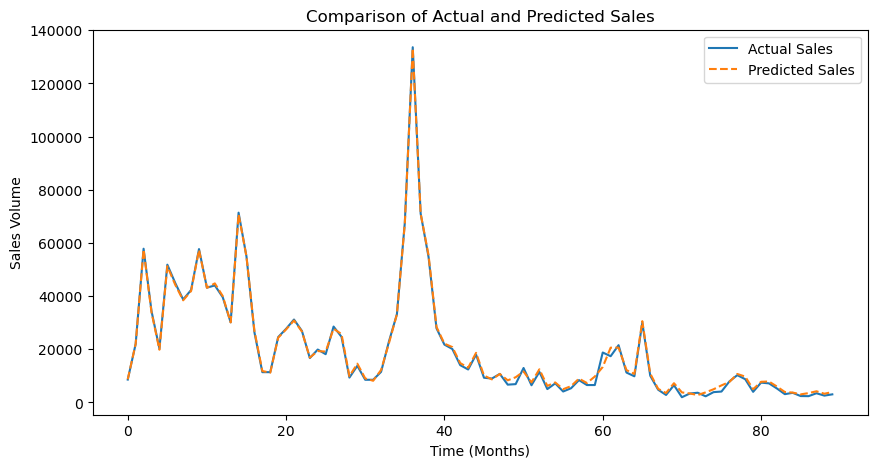

In [7]:
# 预测并存储结果
predictions = []
targets = []

for dataset in dataloaders:
    X_train = dataset[0]
    y_train = dataset[1]
    hidden = (torch.zeros(1, 1, hidden_size),
              torch.zeros(1, 1, hidden_size))

    model.eval()  # 将模型设置为评估模式
    with torch.no_grad():
        pred_series = []
        for i in range(len(X_train)):
            x_input = X_train[i].view(1, 1, -1)  # 输入数据
            y_target = y_train[i].view(-1)  # 真实目标值
            y_pred, hidden = model(x_input, hidden)
            pred_series.append(y_pred.item())
    
    # 反归一化
    pred_series = scaler_y.inverse_transform(np.array(pred_series).reshape(-1, 1)).flatten()
    true_series = scaler_y.inverse_transform(y_train.numpy().reshape(-1, 1)).flatten()

    # 存储预测和目标数据
    predictions.extend(pred_series)
    targets.extend(true_series)

# 可视化
plt.figure(figsize=(10, 5))
plt.plot(targets, label='Actual Sales')
plt.plot(predictions, label='Predicted Sales', linestyle='--')
plt.title('Comparison of Actual and Predicted Sales')
plt.xlabel('Time (Months)')
plt.ylabel('Sales Volume')
plt.legend()
plt.show()

In [23]:
torch.save(model.state_dict(), 'pillow_total_sales_model.pth')

In [24]:
import joblib
# 保存 scaler_X 到文件
joblib.dump(scaler_X, 'feature_scaler.pkl')
joblib.dump(scaler_y, 'target_scaler.pkl')

['target_scaler.pkl']

### 测试

In [8]:
monthly_averages = df1.groupby('Month').mean()
monthly_averages['Sales_volume'] = 0
df_reset = monthly_averages.reset_index()

In [17]:
general_averages = df1.mean()
df_predict_features = df_reset[features].copy()

df_predict_features

,Month,Sales_volume,Total_sales,Unit_price,Unit_cost,ROI,Profit_rate,Time_to_peak
0,1,0,466303.600000,110.016768,50.151959,0.648364,0.387928,4.000000
1,2,0,465116.057143,111.172844,49.917308,0.672025,0.396478,4.142857
2,3,0,465116.057143,119.452814,49.663808,0.772947,0.423398,4.142857
3,4,0,390067.100000,109.509827,48.075954,0.704119,0.407355,3.375000
4,5,0,411700.514286,103.970456,47.105599,0.661127,0.393249,3.571429
5,6,0,411700.514286,103.931045,48.098105,0.629117,0.374245,3.571429
6,7,0,411700.514286,97.469322,48.449189,0.539316,0.340164,3.571429
7,8,0,446244.700000,102.423455,50.128011,0.549175,0.341767,3.500000
8,9,0,446244.700000,113.085421,49.855659,0.638186,0.368668,3.500000
9,10,0,446244.700000,113.549565,48.655121,0.684964,0.389257,3.500000


In [41]:
df_predict_features['Total_sales'] = 400000
df_predict_features['Time_to_peak'] = 4

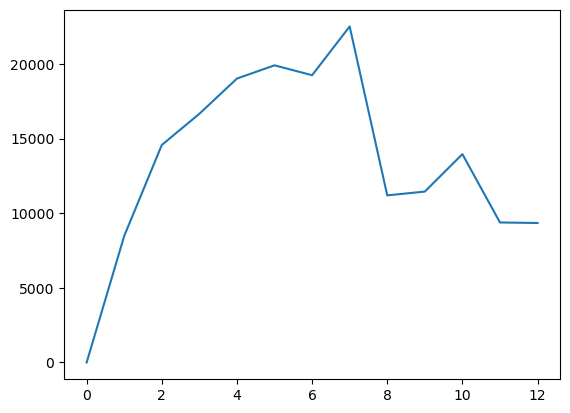

In [42]:
X_test = scaler_X.transform(df_predict_features.values)
X_test

feature_index_dict = {value: index for index, value in enumerate(features)}


#周期预测
predictions = [0]
sales_index = feature_index_dict['Sales_volume']

x_input = X_test[0]  # 输入数据
hidden = (torch.zeros(1, 1, hidden_size),
                  torch.zeros(1, 1, hidden_size))

model.eval()

for i in range(len(X_test)):
    with torch.no_grad():
        
        y_pred, hidden = model(torch.tensor(x_input, dtype=torch.float32).view(1,1,-1), hidden)
        predicted_sales = y_pred.numpy().flatten()[0]
        
        # 反归一化预测值以获得实际的销量
        actual_sales = scaler_y.inverse_transform([[predicted_sales]])[0][0]
        predictions.append(actual_sales)
        if i < (len(X_test)-1):
            x_input = X_test[i+1]
            x_input[sales_index] = y_pred


plt.plot(predictions)

In [28]:
scaler_X.transform(np.array([1,1,1,1,1,1,1,1]).reshape(1,-1))

array([[-1.57096994, -0.92753743, -2.18319387, -3.56261542, -8.82618304,
         1.36847024,  7.4217749 , -1.61719928]])

In [49]:
scaler_X.inverse_transform(np.array([1,2,3,4,5,6,7,8]).reshape(1,-1))[0]

array([9.97404570e+00, 6.21549368e+04, 1.04581124e+06, 2.32955954e+02,
       7.66046613e+01, 2.16044054e+00, 9.64976978e-01, 1.68799802e+01])